In [1]:
from compartmentsBase import *
from compartmentsB import *
from sympy import *
init_printing()


# temp helpers 
def display_hc(k,g,pi,name='c'):
    lhs = symbols('k_' + name)
    rhs = k
    display(Eq(lhs,rhs,evaluate=False))

    lhs = symbols('g_' + name)
    rhs = g
    display(Eq(lhs,rhs,evaluate=False))

    lhs = symbols('\pi_' + name)
    rhs = pi
    display(Eq(lhs,rhs,evaluate=False))


$$
\def\n{\mathbf{n}}
\def\x{\mathbf{x}}
\def\N{\mathbb{\mathbb{N}}}
\def\X{\mathbb{X}}
\def\NX{\mathbb{\N_0^\X}}
\def\C{\mathcal{C}}
\def\Jc{\mathcal{J}_c}
\def\DM{\Delta M_{c,j}}
\newcommand\diff{\mathop{}\!\mathrm{d}}
\def\Xc{\mathbf{X}_c}
\newcommand{\muset}[1]{\dot{\{}#1\dot{\}}}
$$


For a compartment population $\n \in \NX$ evcolving stochastically according to stoichiometric equations from transition classes $\C$, we want to find an expression for
$$
\frac{\diff}{\diff t}\left< f(M^\gamma, M^{\gamma'}, \ldots) \right>
$$
in terms of expectations of population moments $M^\alpha, M^{\beta}, \ldots$

In [2]:
D = 1 # number of species

x = ContentVar('x')
y = ContentVar('y')

# Fragmentation
transition_F = Transition(Compartment(x), Compartment(y) + Compartment(x-y))
k_F = Constant('k_F')
g_F = x[0]
pi_F = 1

transitions = [(transition_F, k_F, g_F, pi_F)]

display(transition_F)
display_hc(k_F, g_F, pi_F, name='F')


[x] ---> [x - y] + [y])

### (1)
From the definition of the compartment dynamics, we have
$$
\diff M^\gamma = \sum_{c \in \C} \sum_{j \in \Jc} \DM^\gamma \diff R_{c,j}
$$
We apply Ito's rule to derive
$$
\diff f(M^\gamma, M^{\gamma'}, \ldots) = \sum_{c \in \C} \sum_{j \in \Jc}
    \left(
        f(M^\gamma + \DM^\gamma, M^{\gamma'} + \DM^{\gamma'}, \ldots)
        - f(M^\gamma, M^{\gamma'}, \ldots)
    \right) \diff R_{c,j}
$$

Assume, that $f(M^\gamma, M^{\gamma'}, \ldots)$ is a polynomial in $M^{\gamma^i}$ with $\gamma^i \in \N_0^D$.

Then $\diff f(M^\gamma, M^{\gamma'}, \ldots)$ is a polynomial in $M^{\gamma^k}, \DM^{\gamma^l}$ with $\gamma^k, \gamma^l \in \N_0^D$, that is,
$$
\diff f(M^\gamma, M^{\gamma'}, \ldots) = \sum_{c \in \C} \sum_{j \in \Jc}
    \sum_{q=1}^{n_q} Q_q(M^{\gamma^k}, \DM^{\gamma^l})
    \diff R_{c,j}
$$
where $Q_q(M^{\gamma^k}, \DM^{\gamma^l})$ are monomials in $M^{\gamma^k}, \DM^{\gamma^l}$.

In [3]:
from ito import *

dM2 = ito(Moment(2))
display(dM2)

DeltaM(2)

### (2)
Let's write $Q_q(M^{\gamma^k}, \DM^{\gamma^l})$ as
$$
Q_q(M^{\gamma^k}, \DM^{\gamma^l}) = k_q \cdot \Pi M^{\gamma^k} \cdot \Pi M^{\gamma^k}
$$
where $k_q$ is a constant,
  $\Pi M^{\gamma^k}$ is a product of powers of $M^{\gamma^k}$, and
  $\Pi \DM^{\gamma^l}$ is a product of powers of $\DM^{\gamma^l}$.
  
Analogous to the derivation in SI Appendix S.3, we arrive at the expected moment dynamics
$$
\frac{\diff\left< f(M^\gamma, M^{\gamma'}, \ldots) \right>}{\diff t} =
    \sum_{c \in \C} \sum_{q=1}^{n_q} \left<
        \sum_{j \in \Jc} k_q \cdot \Pi M^{\gamma^k} \cdot \Pi \DM^{\gamma^k} \cdot h_{c,j}(\n)
    \right>
$$

In [4]:
monomials = decomposeMomentsPolynomial(dM2)

### (3)
Analogous to SI Appendix S.4, the contribution of class $c$, monomial $q$ to the expected dynamics of $f(M^\gamma, M^{\gamma'}, \ldots)$ is
$$
\begin{align}
\frac{\diff\left< f(M^\gamma, M^{\gamma'}, \ldots) \right>}{\diff t}
    &= \left<
        {\large\sum_{j \in \Jc}} k_q \cdot \Pi M^{\gamma^k} \cdot \Pi \DM^{\gamma^l} \cdot h_{c,j}(\n)
    \right>
    \\
    &= \left<
        {\large\sum_{\Xc}} w(\n; \Xc) \cdot k_c \cdot k_q \cdot \Pi M^{\gamma^k} \cdot g_c(\Xc) \cdot
        \left<
            \Pi \DM^{\gamma^l} \;\big|\; \Xc
        \right>
    \right>
\end{align}
$$


In [5]:
c = 0
q = 0

transition = transitions[c]
monomial = monomials[q]

display(transitions[c])
display((monomial.k, monomial.pM, monomial.pDM))


from compartmentsB import getCompartments, getSumMassAction

reactants = getCompartments(transition[0].lhs)
products = getCompartments(transition[0].rhs)
display(reactants)
display(products)

display(getSumMassAction(reactants))

([x] ---> [x - y] + [y]), k_F, x[0], 1)

(1, 1, DeltaM(2))

defaultdict(int, {Compartment(x): 1})

defaultdict(int, {Compartment(x - y): 1, Compartment(y): 1})

Sum(n(x)), (x ∈ 𝕏)

TODO: Form expression
$$
l(\n; \Xc) = k_c \cdot k_q \cdot \Pi(M^{\gamma^k}) \cdot g_c(\Xc) \cdot
        \left<
            \Pi \DM^{\gamma^l} \;\big|\; \Xc
        \right>
$$

In [6]:
monomial = monomials[q]

(transition, k_c, g_c, pi_c) = transitions[c]
(k_q, pM, pDM) = (monomial.k, monomial.pM, monomial.pDM)


reactants = getCompartments(transition.lhs)
products = getCompartments(transition.rhs)

from compartmentsB import deltaM, subsDeltaM

DM_cj = deltaM(reactants, products, D)
display(Eq(symbols('\\text{DM_cj}'), DM_cj))

pDMcj = subsDeltaM(pDM, DM_cj)
display(Eq(symbols('\\text{pDM}'), pDM))
display(Eq(symbols('\\text{pDMcj}'), pDMcj))

                            \gamma[0]       \gamma[0]       \gamma[0]
\text{DM_cj} = (x[0] - y[0])          - x[0]          + y[0]         

\text{pDM} = DeltaM(2)

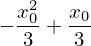

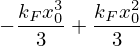

In [7]:
# TODO ...
def conditional_expectation(pDMcj, pi_c):
     return pi_c(pDMcj)
#     return pDMcj # should be pi_c(pDMcj, ???)

def lala(pDMcj):
    return Sum(
        pDMcj * 1 / (x[0] + 1),
        (y[0], 0, x[0])).doit().expand()

pi_c = lala

cexp = conditional_expectation(pDMcj, pi_c)
display(cexp.factor().expand())
   
l_n_Xc = k_c * k_q * pM * g_c * cexp
display(l_n_Xc.factor().expand())

### (4)
Let's consider the expression $A = \sum_{\Xc} w(\n; \Xc) \cdot l(\n; \Xc)$ for the following cases of reactant compartments:
$\Xc = \emptyset$,
$\Xc = \muset{\x}$, and
$\Xc = \muset{\x, \x'}$.

(1) $\Xc = \emptyset$:

Then $w(\n; \Xc) = 1$, and
$$
    A = l(\n)
$$

(2) $\Xc = \muset{\x}$:

Then $w(\n; \Xc) = 1$, and
$$
    A = \sum_{\x \in \X} \n(\x) \cdot l(\n; \muset{\x})
$$

(3) $\Xc = \muset{\x, \x'}$:

Then
$$
    w(\n; \Xc) = \frac{\n(\x)\cdot(\n(\x')-\delta_{\x,\x'})}
    {1+\delta_{\x,\x'}},
$$
and
$$
\begin{align}
    A &= \sum_{\x \in \X} \sum_{\x' \in \X}
            \frac{1}{2-\delta_{\x,\x'}}
            \cdot w(\n; \Xc) \cdot l(\n; \muset{\x, \x'}) \\
      &= \sum_{\x \in \X} \sum_{\x' \in \X}
            \frac{\n(\x)\cdot(\n(\x')-\delta_{\x,\x'})}{2}
            \cdot l(\n; \muset{\x, \x'}) \\
      &= \sum_{\x \in \X} \sum_{\x' \in \X}
            \n(\x)\cdot\n(\x') \cdot \frac{1}{2}l(\n; \muset{\x, \x'})
         \: - \:
         \sum_{\x \in \X}
            \n(\x) \cdot \frac{1}{2}l(\n; \muset{\x, \x})
\end{align}
$$

### (5)
Now let
$$
l(\n; \Xc) = k_c \cdot k_q \cdot \Pi(M^{\gamma^k}) \cdot g_c(\Xc) \cdot
        \left<
            \Pi \DM^{\gamma^l} \;\big|\; \Xc
        \right>
$$

Plugging in the concrete $\gamma^l$ and expanding, $l(\n; \Xc)$ is a polynomial in $\Xc$.

Monomials are of the form $k \x^\alpha$ or $k \x^\alpha \x'^\beta$ with $\alpha, \beta \in \N_0^D$.
(Note that occurences of $\Pi M^{\gamma^k}$ are part of the constants $k$.)

Consider again the different cases of reactant compartments $\Xc$:

(1) $\Xc = \emptyset$:
$$
\frac{\diff\left< f(M^\gamma, M^{\gamma'}, \ldots) \right>}{\diff t}
    = \left<l(\n)\right>
$$

(2) $\Xc = \muset{\x}$:
$$
\frac{\diff\left< f(M^\gamma, M^{\gamma'}, \ldots) \right>}{\diff t}
    = \left<R(l(\n; \muset{\x})\right>
$$
where $R$ replaces all $k \x^\alpha$ by $k M^\alpha$.

(3) $\Xc = \muset{\x, \x'}$:
$$
\frac{\diff\left< f(M^\gamma, M^{\gamma'}, \ldots) \right>}{\diff t}
    = \frac{1}{2}\left<R'(l(\n; \muset{\x, \x'})\right>
    \: - \:
    \frac{1}{2}\left<R(l(\n; \muset{\x, \x})\right>
$$
where $R'$ replaces all $k \x^\alpha \X'^\beta$ by $k M^\alpha M^\beta$,
and again $R$ replaces all $k \x^\alpha$ by $k M^\alpha$.




TODO:

Depending on $\Xc$ case ...
- [x] Replace every occurence of $k \x^\alpha$ by $k M^\alpha$.
- [ ] Replace every occurence of $k \x^\alpha \x'^\beta$ by $k M^\alpha M^\beta$
- [ ] Make full $\frac{1}{2}R'(l(\n; \muset{\x, \x'})-\frac{1}{2}R(l(\n; \muset{\x, \x})$

What is the $\x$ to replace?
- [x] for case $\Xc = \muset{\x}$: only entry of `reactants`
- [ ] later: function to replace $\x'$ in `reactants` and `products` by $\x$.
  (Where, $\x$, $\x'$ are the two entries of `reactants`.)
  Then again, `reactants` will only have one entry.

In [8]:
from compartmentsB import get_dfMdt_contrib

get_dfMdt_contrib(reactants, l_n_Xc, D)

k_F⋅Moment(2)   k_F⋅Moment(3)
───────────── - ─────────────
      3               3      

### (6)
Finally, sum over contributions from all $c$, $q$ for the total
$$
\frac{\diff\left< f(M^\gamma, M^{\gamma'}, \ldots) \right>}{\diff t}
$$